In [24]:
import pandas as pd
import numpy as np


In [25]:
df = pd.read_csv("C:/Users/thaku/Downloads/m23/time_series/Data/airline_passengers.csv"
                 ,index_col = 'Month',parse_dates = True)

In [26]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [27]:
df.index.freq ='MS'

In [28]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [29]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [30]:
# data set goes upto 1960 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [32]:
# size of the test df should be atleast equal to the amount we are predicting
# if needed to predict for 3 months then at leat 3 months should be test size

In [33]:
train_data = df[:108] # can also do loc[:'1900-01-01']
test_data = df[108:]

In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [35]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend = 'mul'
                                    , seasonal ='mul', seasonal_periods = 12).fit()

C:\Users\thaku\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [36]:
test_predictions = fitted_model.forecast(36) 
# since data is in months so passing 12 would mean 1 year prediction

In [37]:
test_predictions

1958-01-01    356.968588
1958-02-01    344.588769
1958-03-01    405.718305
1958-04-01    400.610808
1958-05-01    409.001664
1958-06-01    480.694218
1958-07-01    530.470082
1958-08-01    523.288573
1958-09-01    454.210580
1958-10-01    392.518093
1958-11-01    345.928371
1958-12-01    396.605108
1959-01-01    408.958831
1959-02-01    394.775969
1959-03-01    464.808640
1959-04-01    458.957268
1959-05-01    468.570199
1959-06-01    550.704326
1959-07-01    607.729734
1959-08-01    599.502283
1959-09-01    520.363511
1959-10-01    449.685900
1959-11-01    396.310675
1959-12-01    454.368163
1960-01-01    468.521128
1960-02-01    452.272621
1960-03-01    532.505113
1960-04-01    525.801525
1960-05-01    536.814519
1960-06-01    630.910968
1960-07-01    696.241770
1960-08-01    686.816043
1960-09-01    596.151204
1960-10-01    515.179840
1960-11-01    454.030848
1960-12-01    520.544046
Freq: MS, dtype: float64

<Axes: xlabel='Month'>

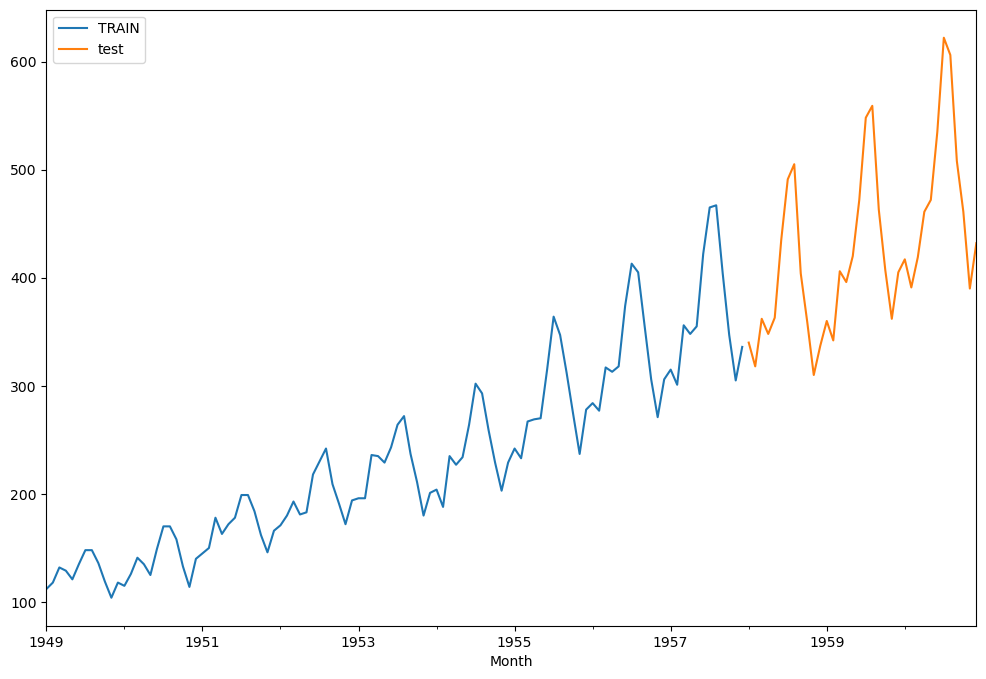

In [38]:
train_data['Thousands of Passengers'].plot(legend = True, label = 'TRAIN',figsize = (12,8))
test_data['Thousands of Passengers'].plot(legend = True, label = 'test',figsize = (12,8))
#real_data

<Axes: xlabel='Month'>

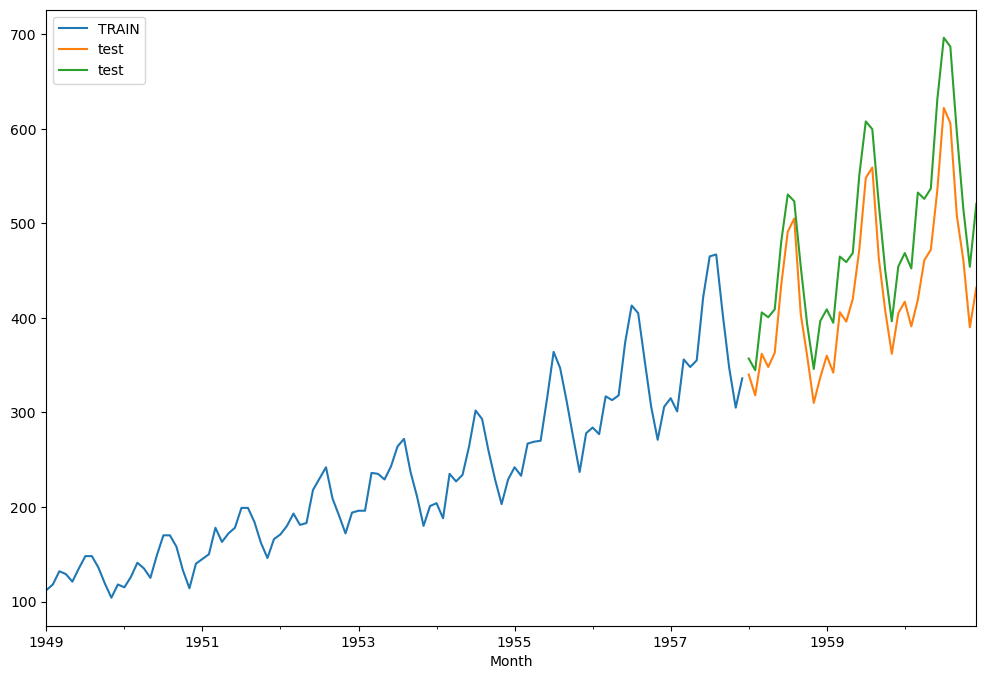

In [39]:
train_data['Thousands of Passengers'].plot(legend = True, label = 'TRAIN',figsize = (12,8))
test_data['Thousands of Passengers'].plot(legend = True, label = 'test',figsize = (12,8))
test_predictions.plot(legend = True, label = 'test',figsize = (12,8))

<Axes: xlabel='Month'>

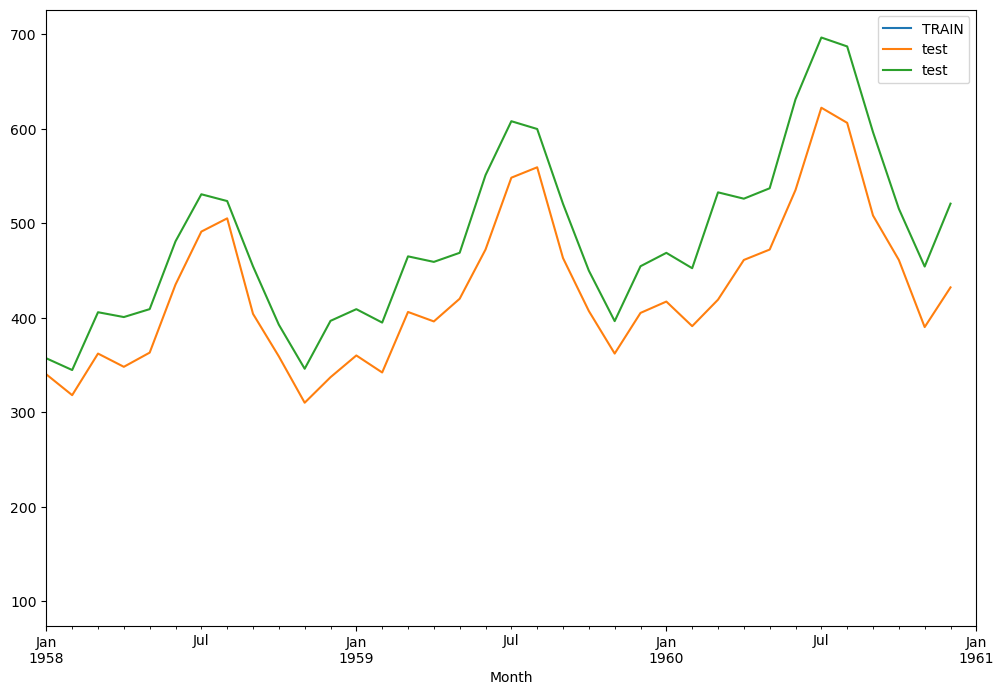

In [40]:
train_data['Thousands of Passengers'].plot(legend = True, label = 'TRAIN',figsize = (12,8))
test_data['Thousands of Passengers'].plot(legend = True, label = 'test',figsize = (12,8))
test_predictions.plot(legend = True, label = 'test',figsize = (12,8), xlim = ['1958-01-01','1961-01-01'])

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [42]:
test_data.shape, test_predictions.shape

((36, 1), (36,))

In [43]:
mean_absolute_error(test_data, test_predictions)

55.69800783318896

In [44]:
mean_squared_error(test_data, test_predictions)

3525.891530341952

In [48]:
np.sqrt(mean_squared_error(test_data, test_predictions))
# close to sstd _Dev means we are quite close (in range)

59.37921800042463

In [49]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [50]:
## supoose we think that  the model is correct 
# now we refit the model
#  use entire data to fit this time

In [53]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend = 'mul', seasonal = 'mul', seasonal_periods = 12).fit()

C:\Users\thaku\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [54]:
forecast_predictions = final_model.forecast(36)
# forecast the 36 monyths

<Axes: xlabel='Month'>

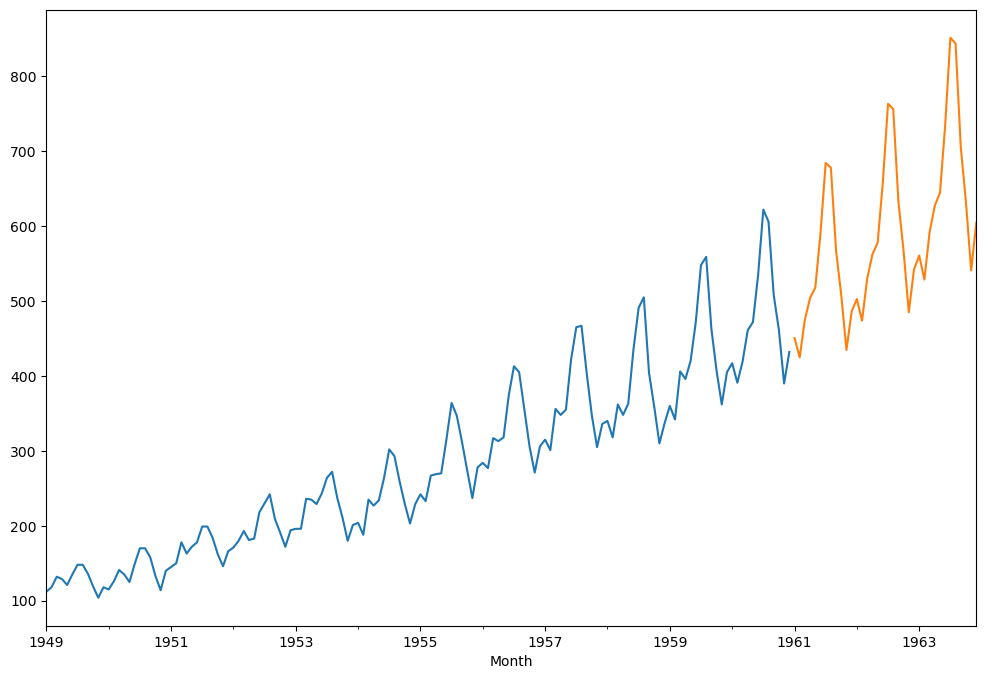

In [57]:
df['Thousands of Passengers'].plot(figsize = (12,8))
forecast_predictions.plot(figsize = (12,8))

### stationary and differencing

In [63]:
df = pd.read_csv("C:/Users/thaku/Downloads/m23/time_series/Data/samples.csv"
                 ,index_col = 0,parse_dates = True)

<Axes: >

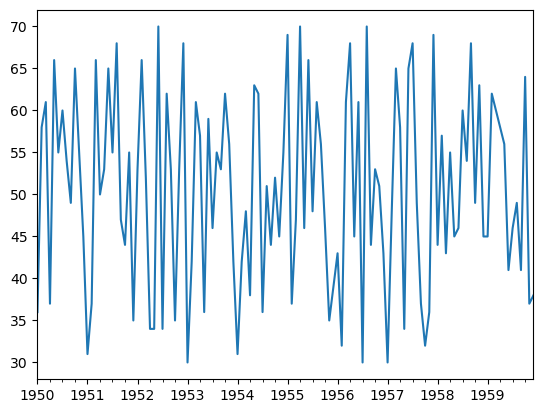

In [64]:
df['a'].plot()

no seasonsality or trend complenent
cannot see if the trend is going up or down over time

also cannot see if there is any repeation / seasonality over the time 

seems like ranndom data

STATIONARY DATA            : SHOWS TREND / SEASONALITY/ BOTH

<Axes: >

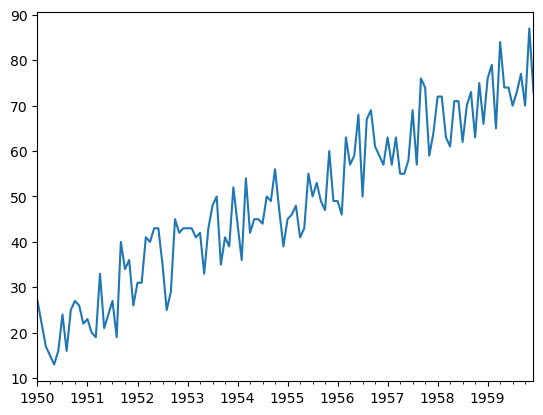

In [67]:
df['b'].plot()

clearly increasing over time 
trend for sure is there


NON STATIONARY DATA


WE we have tests to show if data is stationary or not and based on these we are able to say if it is or not , not possible visually always

 ### differencing

In [69]:
#caclulate diff between consecutive points , converts the sationary to non stationary"

In [71]:
from statsmodels.tsa.statespace.tools import diff

In [75]:
df['b'] -df['b'].shift(1)

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 120, dtype: float64

In [76]:
## we start from nan and then we have diff
df['b']

1950-01-01    27
1950-02-01    22
1950-03-01    17
1950-04-01    15
1950-05-01    13
              ..
1959-08-01    73
1959-09-01    77
1959-10-01    70
1959-11-01    87
1959-12-01    73
Name: b, Length: 120, dtype: int64

<Axes: >

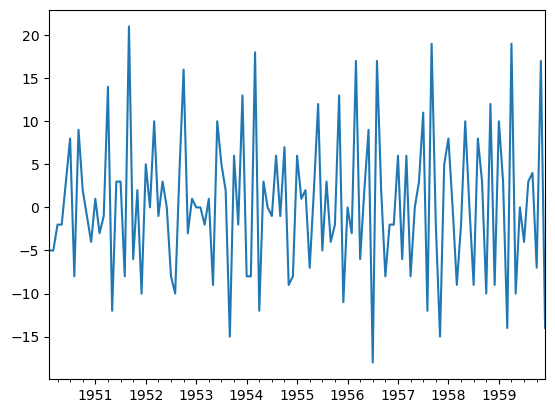

In [78]:
diff(df['b'], k_diff= 1).plot()
# nan entry removed auto mativally

In [79]:
# trend and seasonality removed